## Testing of Stochastic Logistic Regression on Task A1

In [ ]:
#import libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Load one image and its size will be used later
img = cv2.imread('../Datasets/celeba/img/0.jpg',cv2.IMREAD_GRAYSCALE)

In [2]:
#Read the csv. file
df = pd.read_csv('../Datasets/celeba/labels.csv',sep='\t')
#In this task, only the 'gender' column is useful
y = np.array(df['gender'])

In [18]:
#A discarded code where no slicing is applied
#X = np.zeros((5000,img.size))
#for i in range(5000):
#    img = cv2.imread('../Datasets/celeba/img/{}.jpg'.format(i),cv2.IMREAD_GRAYSCALE)
#    X[i,:] = img.reshape(1,img.size)

#Initialization of sample matrix X
X = np.zeros((5000,img.size//4))
#Read and slice each image, then save it as a row of X
for i in range(5000):
    img = cv2.imread('../Datasets/celeba/img/{}.jpg'.format(i),cv2.IMREAD_GRAYSCALE)
    img_Rcompressed = img[np.arange(1,img.shape[0]+1,2)] #Delete one row for each two
    img_compressed = img_Rcompressed[:,np.arange(1,img.shape[1]+1,2)] #Delete one column for each two
    X[i,:] = img_compressed.reshape(1,img_compressed.size)

In [19]:
#Training-validation split in a ratio 3:1
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [20]:
#Definition of sigmoid function
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

In [23]:
#Definition of prediction function
def logRegrNEWRegrPredict(xTest, theta):
    #Intercept a column of ones before input matrix xTest 
    intercept = np.ones((xTest.shape[0], 1))
    xTest = np.concatenate((intercept, xTest), axis=1)
    #Calculate the probability by sigmoid function 
    y_pred1 = sigmoid(np.dot(xTest, theta))
    #Instead of {0,1}, the output values of y are {-1,1}
    y_pred1[y_pred1 >= 0.5]=1
    y_pred1[y_pred1 < 0.5]=-1
    #Return prediction
    return y_pred1

E:\Anaconda\envs\lab\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


finish training! total running time: 3016.856034755707s


In [ ]:
#Start function of training process
def start(xTrain, yTrain):
    #Intercept a column of ones before input matrix xTrain
    intercept = np.ones((xTrain.shape[0], 1))
    xTrain = np.concatenate((intercept, xTrain), axis=1)
    
    yTrain[yTrain < 1] = 0 #Change every value -1 into 0
    
    #Initializations of feature vecctor and accuracy vector used to paint learning curve later
    theta = np.zeros(xTrain.shape[1])
    accuracy = np.zeros(50000)
    
    #Initial guess of step parameter
    lr = 0.0001
    
    #Process of stochastic gradient descent
    for maxIt in range(50000): #50,000 iterations
        #Pick a random sample
        j = random.randint(0,3749)
        
        #Calculation of gradient based on this sample
        xj = xTrain[j,:]
        z = np.dot(xj,theta)
        h = sigmoid(z)
        gradient = (h-yTrain[j])*xj.T
        
        #The new feature vector
        theta = theta - lr*gradient
        
        #Prediction made by new features
        y_pred = logRegrNEWRegrPredict(x_test,theta)
        
        #The accuracy of this prediction
        accuracy[maxIt] = accuracy_score(y_pred,y_test)
    return accuracy

#Timer of training process
time_start = time.time()

accuracy = start(x_train, y_train)

time_end = time.time()
running_time = time_end-time_start
print(f'finish training! total running time: {running_time}s')

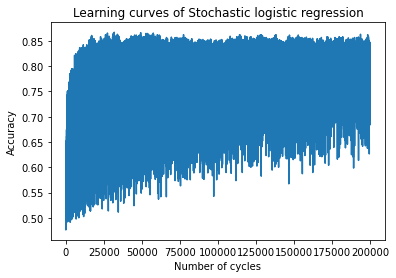

In [24]:
#Paint the learing curve with accuracy vector against number of iterations
plt.title('Learning curves of Stochastic logistic regression')
plt.xlabel('Number of cycles')
plt.ylabel('Accuracy')
plt.plot(np.linspace(1,50000,50000),accuracy)